<center><h1>Optimisation et atterrissage automatique de fusées</h1></center>

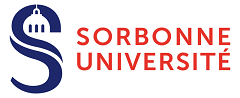

<center><h2>Licence 2 Physique - PAD</h2></center>

<center><h3>Jonathan Kianguebeni - Jîyan Akbay</h3></center>

<center><h4>Année universitaire 2021/2022</h4></center>

# Introduction

# I) Modèle

Nous allons dans cette section présenter le modèle que nous avons simulé (I.A). Nous présenterons ensuite de manière générale la méthode algorithmique utilisée pour résoudre le problème (I.B).

## I.A) Modélisation physique du problème

Nous allons dans la présente section présenter le modèle simplifié avec un degré de liberté et sans perte de masse (I.A.1). Nous verrons ensuite le modèle avec perte de masse (I.A.2).

### I.A.1) Modèle simplifié

Nous traitons ici d'un modèle très simplifié de fusée. Celle-ci est ponctuelle, ne perd pas de masse et n'est soumise à aucune trainée.

La fusée n'est soumise qu'à deux forces : la pesanteur $\bar{P} = -m g \hat{z}$ et la poussée $\bar{T} = T\hat{z}$.

Les équations de Newton du modèle sont :

\begin{cases}
    \dot{z} = v_z \\
    \dot{v_z} = \frac{T}{m} - g
\end{cases}

Où $m$ est la masse de la fusée et $T$ est une fonction que contrôlera l'algorithme. La condition nécessaire pour qu'il y ait une solution satisfaisante est que $T > g$, sans quoi la fusée ne pourra jamais que s'écraser.

L'objectif du présent travail est de minimiser la quantité suivante :

\begin{align}
    J = \int^{t_f}_{t_i}T^2 \,dt
\end{align}

Il s'agit de la quantité de poussée utilisée pendant le vol. Autrement dit, on cherche à minimiser l'utilisation de carburant.

Les conditions initiales sont :

\begin{cases}
    z_0 = \left\{20000, 10000, 5000\right\} \textrm{ m} \\
    \dot{z}_0 = 0 \textrm{ m s}^{-1} \\
\end{cases}

Les conditions finales sont :

\begin{cases}
    z_f = 0 \textrm{m} \\
    \dot{z_f} \le 0,1 \textrm{ m s}^{-1}  \\
\end{cases}

Nous avons estimé qu'une vitesse d'atterrissage de $0,1$ m s$^{-1}$ était raisonnable.

Lorsque la fusée ne pousse pas, les fonctions de mouvement de la fusée sont :

\begin{cases}
    \ddot{z}(t) = -g \\
    \dot{z}(t) = -gt + \dot{z}_0  \\
    z(t) = -\frac{g}{2}t^2 + \dot{z}_0t + z_0  \\
\end{cases}

Lorsque la fusée utilise ses boosters, les fonctions de mouvement de la fusée deviennent :

\begin{cases}
    \ddot{z}_B(t) = T - g \\
    \dot{z}_B(t) = (T - g)\,t + \dot{z}_{0B}  \\
    z_B(t) = \frac{T - g}{2}t^2 + \dot{z}_{0B}t + z_{0B}  \\
\end{cases}

Nous proposons une solution minimisant le temps d'atterrissage, nous verrons comment elle se compare avec les solutions obtenues par l'algorithme.

Nous voulons choisir un $t_B$ d'allumage des boosters de manière à ce que $z_B(t) = 0$ soit possible. Mieux, nous voulons qu'il n'y ait qu'une seule solution réelle. Dans le cas où les solutions sont complexes, la fusée  descendrait jusqu'à un point $z_{min} \ge 0$ avant de remonter. Dans le cas où il y a deux solutions réelles, cela veut dire que la fusée s'enfonce dans le sol avant de remonter, ce qui n'est évidemment pas possible dans le monde physique.

En d'autres termes, nous voulons que le discriminant de la fonction $z_B(t)$ soit nul, c'est à dire que :

\begin{align}
    \dot{z}_{OB}^2 - 4 \, \frac{T - g}{2} \, z_{0B} = 0 \\
    \Leftrightarrow z_{0B} = \frac{\dot{z}_{OB}^2}{2\,(T - g)}
\end{align}

Notre programme devra en permanence surveiller l'altitude et la vélocité courantes et lancer les boosters une fois que cette relation sera vérifiée.

Il y a un petit bémol lié à l'erreur de calcul numérique. Il sera en pratique très difficile de trouver l'exact moment où lancer les boosters sans que la fusée ne s'écrase ou bien remonte vers les $\hat{z}$ positifs. Nous devrons donc chercher le moment juste avant que l'altitude limite soit dépassée, lancer les boosters, nous laisser tomber jusqu'à atteindre une vélocité inférieure ou égale à la vélocité max d'atterrissage et ensuite maintenir les boosters avec une accélération égale à $g$ pour que la fusée se contente de finir sa descente à vitesse constante.

### I.A.2) Modèle avec perte de masse

Dans ce cas-ci, la fusée est toujours ponctuelle et n'est soumise à aucune trainée mais elle perd de la masse.

Comme précédemment, la fusée n'est soumise qu'à deux forces mais leur définition change quelque peu : la pesanteur $\bar{P} = -(m_0 + \dot{m} t) g \hat{z}$ et la poussée $\bar{T} = -\dot{m} v_e{z}$.

Où $m_0$ est la masse initiale de la fusée, à savoir la masse à vide à laquelle s'ajoute la quantité de carburant. $\dot{m}$ est la quantité de masse éjectée par seconde. $v_e \le 0$ est la vitesse d'éjection de masse par la fusée. 

Les équations de Newton du modèle sont donc$\,^{1 \, 2}$ :

\begin{cases}
    \dot{z} = v_z \\
    \dot{v_z} = -\frac{\dot{m} v_e}{m_0 + \dot{m} t} - g \\
    \dot{m} = \dot{m}_0
\end{cases}

$T$ est une fonction que contrôlera l'algorithme. La condition nécessaire pour qu'il y ait une solution satisfaisante est que $T > g$, sans quoi la fusée ne pourra jamais que s'écraser.

L'objectif du présent travail est de minimiser la quantité suivante :

\begin{align}
    J = \int^{t_f}_{t_i}T^2 \,dt
\end{align}

Il s'agit de la quantité de poussée utilisée pendant le vol. Autrement dit, on cherche à minimiser l'utilisation de carburant.

Les conditions initiales sont :

\begin{cases}
    z_0 = \left[1960, 2000\right] \textrm{ m} \\
    \dot{z}_0 = 0 \textrm{ m s}^{-1} \\
\end{cases}

$z_0$ est une plage continue qui commence très étroite et s'élargit au fur et à mesure que l'algorithme génétique implémenté apprend. Configurer cet intervalle trop étroit fait que l'algorithme risque de sur-ajuster, auquel cas il sera par exemple capable de poser parfaitement la fusée depuis une hauteur $h$ mais ne fonctionnera plus du tout correctement au moindre changement dans les conditions initiales. Le configurer sur un intervalle trop large l'empêchera complètement de converger.

Les conditions finales, quant à elles, restent :

\begin{cases}
    z_f = 0 \textrm{m} \\
    \dot{z_f} \le 0,1 \textrm{ m s}^{-1}  \\
\end{cases}

C'est à dire les mêmes que dans le cas précédent.

Comme il n'est pas possible d'obtenir analytiquement une solution d'optimisation de ce problème, nous allons le résoudre numériquement à l'aide d'un algorithme génétique. Nous allons donc passer à la résolution numérique du problème.

## I.B) Résolution numérique

Pour tenter de résoudre notre problème et répondre à la problématique nous avons décidé de recourir à une approche aussi intéressante à appliquer qu’à étudier. Notre solution repose sur deux concepts développés dans le domaine des sciences de l’informatique qui sont :
- Les réseaux de neurones artificiels (I.B.1)
- Les algorithmes génétiques (I.B.2)

### I.B.1) Les réseaux de neurones artificiels

Ils font partie de cette famille d’algorithmes ayant pour intention de doter des ordinateurs d’une capacité d’apprentissage.
Les réseaux de neurones artificiels sont nés en 1943 d’un  neurophysiologiste, Warren McCulloch et d’un mathématicien, Walter Pitts. 
Ils présentent les fondements d’une approche cherchant à mimer la biologie humaine et plus particulièrement la façon dont les neurones humains interagissent chez un animal tel que l’homme. 
Une représentation répandue et toujours présentée pour leurs études est celle du Perceptron :

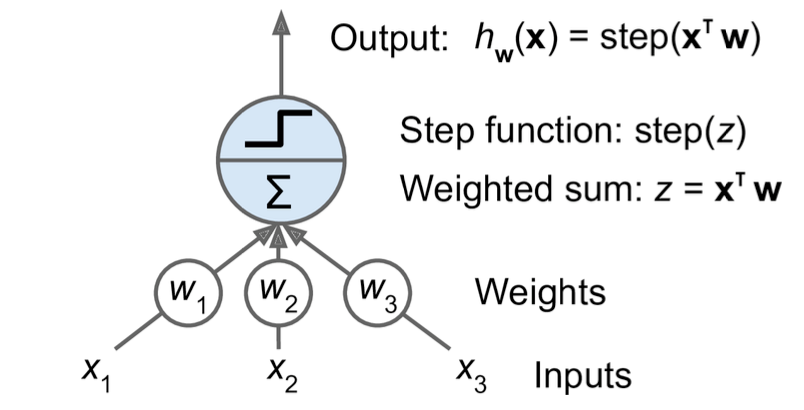

Il s’agit ici d’une des architectures les plus simplifiées d’ANN que l’ont doit à Franck Rossenblatt (1957).

L’objectif ici est de trouver ou plutôt de prédire une valeur d’intérêt. Dans le monde réel, cela peut être assimilé à l’estimation du prix d’une maison ou si une voiture doit s’arrêter à un feu ou pas.

Toute ces décisions peuvent être réduites à une valeur numérique : le prix pour la maison et une valeur supérieure à un certain seuil pour savoir si la voiture doit s’arrêter par exemple. 

Une telle décision se fera en se basant sur ce qu’on nommera par la suite des inputs soit des variables permettant de caractériser un problème et à partir desquelles notre algorithme devrait être en mesure de faire une prédiction.

Un exemple simplifié de l’image présenté sous forme d’équation peut être donnée ainsi:

\begin{align}
    z=\sum w_i \, x_i + b \\
    y = \textrm{sigmoid}(z)
\end{align}

Avec sigmoid$(z) = \frac{1}{1+e^{-z}}$, la fonction d'activation. Le choix d'une fonction sigmoïde sera expliqué par la suite. $b$ correspond au biais. $y$ est la valeur prédite à l'aide du modèle. Les $w_i$ sont les poids associés à chaque input $x_i$, que l’on peut voir comme la magnitude ou l’importance de cette input, relativement au noeud dont on cherche à faire la somme. Les inputs qui peuvent être le nombre de chambres ou les coordonnées géographiques si on s’intéresse au prix d’un appartement, par exemple.

Les réseaux sont un outil versatile appliqués aussi bien dans la reconnaissance d’image via les CNN (convolutional neural network) ou le dialogue humain IA. Le nombre de paramètres peut varier considérablement comparé à ce que l’on a pu voir jusqu’ici, avec des réseaux de neurones de plusieurs dizaines de milliards de paramètres ou poids et pouvant s’appliquer à de nombreux problèmes.

Comme il en est question dans notre introduction nous cherchons à assister l’atterrissage d’une fusée de façon automatisée. Pour cela nous emploierons un réseau de neurones dont le but sera, à chaque itération de la boucle du jeu, de prédire si la fusée doit allumer ses boosters ou les éteindre, avec pour objectif d’obtenir une intelligence artificielle capable de faire atterrir une fusée sans intervention humaine, du moins dans notre simulation.

Une illustration du modèle que nous avons construit est la suivante :

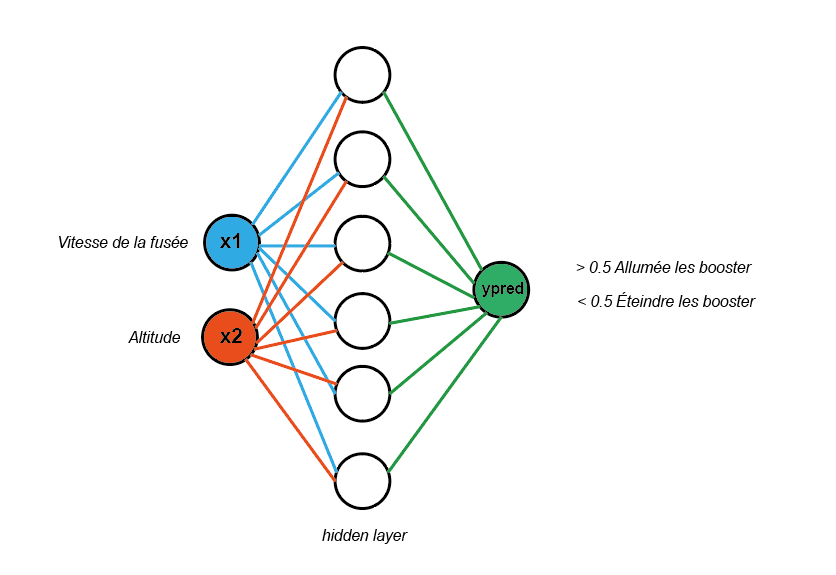

Il est à noter que l'on parle de « Deep Neural Network » ou réseau de neurones profond lorsque notre structure comporte une ou plusieurs de ce que l’on appelle une couche cachée, ou « hidden layer », cela y compris lorsque le réseau considéré est « shallow » comme celui-ci et qu’il ne contient qu’une couche cachée avec peu de neurones.

Le choix d’une sigmoïde est la réponse à deux réflexions :
-Ce type d’algorithme traite mieux avec des données ramenées à une amplitude faible, c'est à dire lorsque les input varient peu.
-La sigmoïde nous permet d’obtenir une valeur comprise entre 0 et 1, parfaite pour notre problème binaire à savoir « allumer » « éteindre » les boosters.

Nous sommes arrivés ici à créer un modèle qui permettra à notre fusée de décider ce qu’elle doit faire à chaque itération. Il reste maintenant à discuter de la façon dont elle va être entraînée.

### I.B.2) Les algorithmes génétiques

Nous avons précédemment présenté le modèle sur laquelle notre fusée prendra ses décisions, il convient maintenant de lui fournir un moyen d’itérer et d’ajuster ses « poids » afin de s’améliorer à chaque itération et de produire un modèle réellement capable de prendre des décisions de manière autonome. Pour cela, nous allons recourir à un autre concept emprunté aux sciences de l’informatique.

Avant d’entrer dans le vif du sujet faisons un tour des lieux : 
-Notre programme dispose d’une fusée et des moyen nécessaire pour activer ou désactiver ses boosters
-Le jeu est inséré à l’intérieur d’une boucle qui chaque itération applique les équations physiques qui régissent le déplacement de la fusée, ce qui nous permet également d’apporter en entrée à notre modèle des informations sur l’état actuel de la fusée, à savoir sa vitesse et sa position.
	
Les algorithmes génétiques, tout comme les réseaux de neurones s’inspirent de la biologie et plus précisément de la sélection naturelle, cela en faisant intervenir trois opérations :
- croisement (crossover)
- mutation
- sélection

Pour expliquer plus en amont le fonctionnement nous allons définir quelques termes communément employés pour ce type d’algorithmes.

Nous considérons ici une **population** qui correspond dans notre cas à un ensemble de fusées (100, admettons). Chaque **organisme** de cette population se voit pourvu d’un réseau de neurones, celui présenté à la fin de la partie précédente, dont les poids vont constituer le **phénotype** ou plus précisément son **ADN**. La première population ou « **première génération** » considérée est constituée d’individus dont les poids sont générés aléatoirement avec des valeurs comprises entre -1 et 1. Ce choix d’intervalle s’explique par la nature du fonctionnement des réseaux de neurones, qui convergent plus aisément et rapidement vers une solution quand la magnitude de l’écart entre chaque input et relativement stable, d’où la profusion d’exemples employant des techniques de normalisation des données en machine learning. Il est également raisonnable d’appliquer ce raisonnement en ce qui concerne les poids de notre modèle. 

À partir de cette population de départ, nous pouvons commencer l’entraînement et la résolution de notre problème.

#### Initialisation

Chaque « passe » ou phase d’entraînement consiste à la mise en condition de notre population : 
	
- Toutes les fusées sont lâchées d’une altitude de 5000 mètres avec comme autre condition initiale une vitesse nulle et d’un carburant fixé à $1200000$ tonnes.
	
- À chaque tour de boucle, la vitesse de chaque fusée ainsi que son altitude sont calculées, afin d’en garder trace mais également pour appliquer les équations de la physique qui régit le déplacement de ces fusées.
	
- À chaque tour de boucle chacune des fusées doit prédire, compte tenu de sa vitesse et de son altitude, si la bonne action à réaliser est d’allumer ses booster ou de les éteindre.
 	
- Une fusée est considéré « morte » ou ayant terminé sa « course » si :
	- Elle a dépensé tout son carburant.
	- Elle est partie trop loin dans le mauvais sens.
	- Elle est arrivée à une altitude de 0.
	
- La simulation pour cette population prend fin lorsques toute les fusées sont mortes ou ont fini par arriver à une altitude de 0 mètre.
	
- Lorsqu’une fusée « meurt » ou finit sa « course » nous préservons :
	- Sa distance à l'objectif, ou altitude. 
	- Le carburant restant.
	- Sa vitesse finale (celle qu’elle a lorsque qu’elle meurt ou atterrit).

#### Calcul du fitness

Après une mise à l’épreuve de nos fusées, nous devons maintenant récolter les données obtenues, afin de faire une analyse de la performance des membres de la génération étudiée. Car en effet, nous devons disposer d’un moyen de faire « comprendre » à notre modèle ce que nous voulons, à savoir : 
- Atterrir, ce qui n’est pas intuitif en tant que tel pour un ordinateur
- Atterrir à une vitesse proche de zéro
- Pénaliser les fusées qui partent dans la mauvaise direction
- Pénaliser les fusées à court de carburant et avec une altitude supérieure à 0 

Pour cela nous emploierons une fonction qui permettra selon ces critères d’évaluer et de comparer la performance de chacune de nos fusées. Cette fonction sera maximisée si la fusée respecte un maximum d’entre elles. 

Le terme souvent employé pour cette fonction à maximiser est le **fitness**, encore emprunté au vocabulaire de la biologie. Cette fonction est un élément central de notre algorithme et de l’entraînement, car il s’agit de la fonction que notre modèle va chercher à maximiser, optimisant par la réponse à notre problème.

Nos contraintes étant données nous pouvons esquisser à titre de d’exemple l’apparence de cette fonction :
\begin{align}
    \textrm{fitness} = \frac{1}{v_f + d_{sol}}
\end{align}
Nous voyons ici apparaître la vitesse finale, $v_f$ et la disance au sol $d_{sol}$. Plus celles-ci seront proches de $0$, plus la fusée aura un score élevé. C’est bien ce que nous voulons, à savoir une fusée qui n’arrive pas à $400$ km/h sur le sol, ce qui serait dommageable. Le même raisonnement s’applique pour la distance : nous ne voulons pas d’une fusée épuisant tout son carburant en vol et qui s’écrase.

Si les conditions d'altitude finale nulle et de vitesse finale faible sont respectées, le fitness devient :
\begin{align}
    \textrm{fitness} = m_r
\end{align}
Où $m_r$ est la masse de carburant restant. L'algorithme cherche donc en premier lieu à atterrir correctement, et ensuite à minimiser sa consommation de carburant.

À partir de cette information nous allons maintenant pouvoir passer au cœur du fonctionnement de l’algorithme soit la création d’une nouvelle génération.

#### Sélection

Cette opération peut être résumée par une phrase connue que l’on doit à Darwin : « Survival of the fittest » autrement dit, « la survie du plus adapté ». Il s’agit ici de préserver les membres de la population ayant le mieux répondu à nos contraintes durant la simulation, et par conséquent ayant obtenu le score plus élevé. Ce nombre peut varier en fonction de la taille de la population par exemple. 

Ce qu’il faut retenir, c’est que le choix du nombre de représentants d’une population, comme beaucoup d’autres paramètres d’algorithmes de Machine Learning, est l’objet de ce que l’on appelle en data science le **fine-tuning**, soit le procédé qui consiste à sélectionner des paramètres permettant au mieux de répondre à la problématique en produisant un modèle offrant les meilleures performances possibles.

Dans cette étape nous avons choisi de sélectionner les 20 meilleurs représentants de la génération en cours afin de préserver leur **patrimoine génétique**. Rappelons-le : nous valorisons les fusées disposant des poids $w_i$ qui leur ont permis de répondre au mieux aux exigences de notre problème à savoir atterrir avec une vitesse minimum et avec un maximum de carburant possible.

À partir de ce sous « pool » de fusées, nous pouvons commencer à créer une nouvelle population qui sera amenée à être l’objet d’une nouvelle simulation dans les mêmes conditions. 

Ce qui nous amène au croisement, le crossover.

#### Croisement

Il s’agit ici d’effectuer une opération analogue à la reproduction en milieu naturel, où les plus adaptés ont survécu et vont servir de références pour créer une progéniture qui viendra faire « évoluer » leur population dans l’intention (pour nous, pas dans la vraie nature) d’obtenir de meilleurs résultats.

Notre algorithme fonctionne de façon simple. Il consister à itérer à travers les poids des parents et à sélectionner aléatoirement le poids de l’un ou l’autre des parents. 

Il est à noter que la proximité avec la biologie de ce procédé se retrouve lorsque l’ADN d’un nouvel individu est construit à partir de celui de ses deux parents (via leurs chromosomes notamment). Il est particulièrement « beau » dans son approche, malgré la simplicité de sa représentation dans notre cas.

#### Mutation

Si la reproduction permet de préserver des compétences et attributs acquis par une espèce, la diversité d’espèces présentes sur notre planète n’aurait aucune chance d’exister sans les mutations, ces petites variations du patrimoine génétique qui sont à l’origine des plus grands bouleversements du monde biologique. 

Il existe trois grandes catégories d’organismes cellulaires sur notre planète :
	
- Les archea
- Les bactéries 
- Les eucaryotes (dont nous faisons partie)

Il existe un courant de pensée ayant émis l’hypothèse étayée que la plus simple de ces familles serait à l’origine des deux autres, au travers du mécanisme (non le seul) qui nous intéresse ici : les mutations. 

Ce sont généralement des phénomènes aléatoires mais pas toujours. Par exemple, fumer provoque le type de mutation dont il est question sur notre ADN. Dans une mesure beaucoup plus manifeste, les radiations provoquent aussi des mutations de l’ADN. 

Par un jeu de d’essais et d’erreurs, ces mutations ont permis d’aider de nombreux organismes à découvrir de nouvelles capacités qui leurs ont permis de mieux s’approprier leurs environnements, voire d’en créer de nouveaux.

En biologie il s’agit de changer une lettre A, C, G, T ou toute une série qui peuvent conduire à l’inactivation d’un gène ou à la création d’un nouveau. Dans notre cas, il s’agit d’introduire de petites variations aux poids des modèles de notre progéniture et des parents les plus adaptés afin de se prémunir de plusieurs problèmes rencontrés avec ce type de modèles que sont les réseaux de neurones :
	
- Convergence rapide/prématurée vers un minimum local et une solution sous optimale
- Stagnation de la population de génération en génération/pas d’amélioration du fitness

À noter qu’il existe d’autres moyens d’introduire des mutations au sein d’une population pour ce type d’algorithme. Une de ces approches consiste non pas à faire varier sensiblement les poids de nos individus mais à modifier la structure même de leur modèle en rajoutant des neurones au réseau cela aléatoirement. Un autre moyen encore, consiste à ajouter des connexions (aléatoires également) entre différents neurones, un qui relierait directement un des inputs à l’output. Ces deux approches ont été représentées ci-dessous :

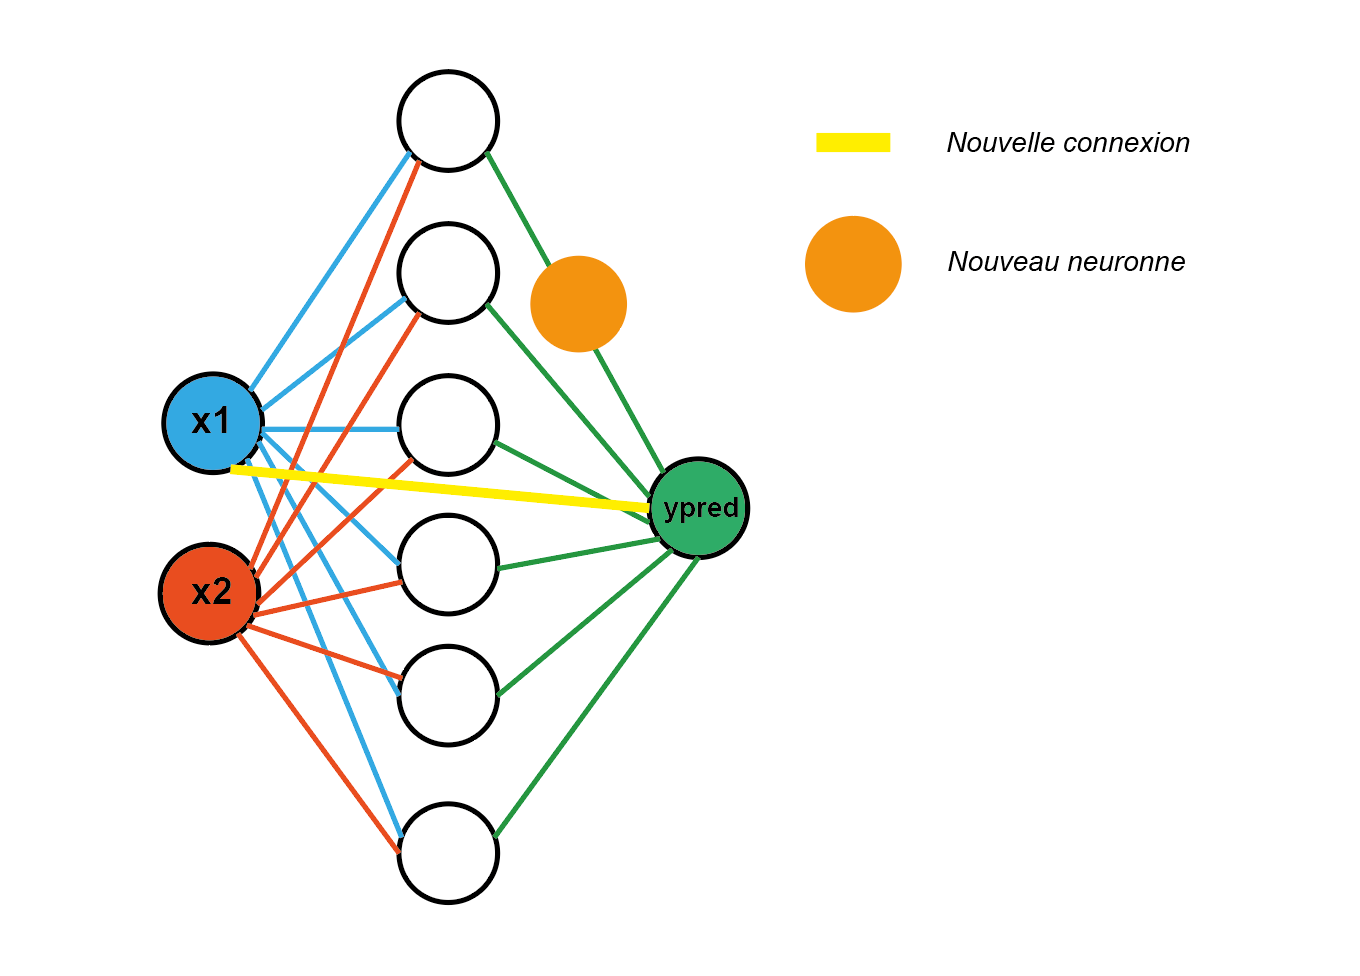

Dans l'implémentation que nous avons faite, nous avons également décidé de faire varier le taux de mutation de la population en fonction du temps. Nous avons pour cela appliqué une fonction cosinus au taux de mutation, modulée par une exponentielle décroissante. Ainsi, il y aura des vagues de mutations très importantes au début de la simulation pour permettre à l'algorithme d'explorer au mieux l'espace des solutions, mais elles s'atténueront au cours du temps afin de lui permettre de converger vers l'extremum absolu de la fonction à optimiser$\,^3$.

# II) Algorithme

# III) Résultats et discussion

# Conclusion

# Bibliographie

[1] **Guidance and Control for Launch and Vertical Descend of Reusable Launchers using Model Predictive Control and Convex Optimisation**, Guillermo Zaragoza Prous, Luleå University of Technology, Department of Computer Science, Electrical and Space Engineering, 2020

[2] **Dynamic Optimization in Python: Rocket Soft Landing**, Shvab, https://medium.com/analytics-vidhya/dynamic-optimization-in-python-rocket-soft-landing-a5a68eaf3b94

[3] **Setting the learning rate of your neural network**, Jordan, https://www.jeremyjordan.me/nn-learning-rate/

**A logical calculus of ideas immanent in nervous activity**, McCulloch and Pitts, University of Illinois,  https://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf

Stanford, http://nifty.stanford.edu/2021/de-freitas-weingart-rocket-simulator/tutorials/index.html